In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from itertools import cycle
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFECV
import statsmodels.discrete.discrete_model as sm
from sklearn.utils import resample

We've included all the necessary libraries to be used in this assignment in one place

### Solution to 1(a) as below:

We've downloaded the dataset into our local. We did some minor cleaning of the csvs using Excel itself. The below step shows all the files and their paths, as present in the local. 

However, we noticed the dataset4 of folder 'bending2' needed some additional cleaning which is carried out as below. We've put this as markdown so that the cleaning doesn't occur everytime the below cell is called.

dfx=pd.read_csv('/Users/sharadsharma/Downloads/AReM/bending2/dataset4.csv')

dfx = pd.DataFrame(dfx['Columns: time'].str.split(' ',6).tolist(),
                                   columns = ['Columns:time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])

dfx.to_csv('/Users/sharadsharma/Downloads/AReM/bending2/dataset4.csv')


In [2]:
count_csv=0
for x in glob.glob('/Users/sharadsharma/Downloads/AReM/*/*.csv'):
    print (x)
    count_csv=count_csv+1

/Users/sharadsharma/Downloads/AReM/bending1/dataset7.csv
/Users/sharadsharma/Downloads/AReM/bending1/dataset6.csv
/Users/sharadsharma/Downloads/AReM/bending1/dataset4.csv
/Users/sharadsharma/Downloads/AReM/bending1/dataset5.csv
/Users/sharadsharma/Downloads/AReM/bending1/dataset1.csv
/Users/sharadsharma/Downloads/AReM/bending1/dataset2.csv
/Users/sharadsharma/Downloads/AReM/bending1/dataset3.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset7.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset6.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset4.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset5.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset1.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset2.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset3.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset10.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset11.csv
/Users/sharadsharma/Downloads/AReM/walking/dataset13.csv
/Users/sharadsharma/Downloads/AReM/wal

In [3]:
print(count_csv)

88


This gets all the 88 csvs/files present in the folder AReM.

### Solution to 1(b) as below:

For splitting instances across training and test sets, we've created two folder 'train_data' and 'test_data' inside our main folder, and added the respective instances to the 'train_data' and 'test_data' folders.

We'll show the files under each folder as below:

In [4]:
count=0
for x in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
    print (x)
    count=count+1
print("the no of csvs in train_data folder is:",count)

/Users/sharadsharma/Downloads/AReM/train_data/bending1/dataset7.csv
/Users/sharadsharma/Downloads/AReM/train_data/bending1/dataset6.csv
/Users/sharadsharma/Downloads/AReM/train_data/bending1/dataset4.csv
/Users/sharadsharma/Downloads/AReM/train_data/bending1/dataset5.csv
/Users/sharadsharma/Downloads/AReM/train_data/bending1/dataset3.csv
/Users/sharadsharma/Downloads/AReM/train_data/walking/dataset7.csv
/Users/sharadsharma/Downloads/AReM/train_data/walking/dataset6.csv
/Users/sharadsharma/Downloads/AReM/train_data/walking/dataset4.csv
/Users/sharadsharma/Downloads/AReM/train_data/walking/dataset5.csv
/Users/sharadsharma/Downloads/AReM/train_data/walking/dataset10.csv
/Users/sharadsharma/Downloads/AReM/train_data/walking/dataset11.csv
/Users/sharadsharma/Downloads/AReM/train_data/walking/dataset13.csv
/Users/sharadsharma/Downloads/AReM/train_data/walking/dataset12.csv
/Users/sharadsharma/Downloads/AReM/train_data/walking/dataset15.csv
/Users/sharadsharma/Downloads/AReM/train_data/walkin

In [5]:
count=0
for x in glob.glob('/Users/sharadsharma/Downloads/AReM/test_data/*/*.csv'):
    print (x)
    count=count+1
print("the no of csvs in test_data folder is:",count)

/Users/sharadsharma/Downloads/AReM/test_data/bending1/dataset1.csv
/Users/sharadsharma/Downloads/AReM/test_data/bending1/dataset2.csv
/Users/sharadsharma/Downloads/AReM/test_data/walking/dataset1.csv
/Users/sharadsharma/Downloads/AReM/test_data/walking/dataset2.csv
/Users/sharadsharma/Downloads/AReM/test_data/walking/dataset3.csv
/Users/sharadsharma/Downloads/AReM/test_data/bending2/dataset1.csv
/Users/sharadsharma/Downloads/AReM/test_data/bending2/dataset2.csv
/Users/sharadsharma/Downloads/AReM/test_data/standing/dataset1.csv
/Users/sharadsharma/Downloads/AReM/test_data/standing/dataset2.csv
/Users/sharadsharma/Downloads/AReM/test_data/standing/dataset3.csv
/Users/sharadsharma/Downloads/AReM/test_data/sitting/dataset1.csv
/Users/sharadsharma/Downloads/AReM/test_data/sitting/dataset2.csv
/Users/sharadsharma/Downloads/AReM/test_data/sitting/dataset3.csv
/Users/sharadsharma/Downloads/AReM/test_data/lying/dataset1.csv
/Users/sharadsharma/Downloads/AReM/test_data/lying/dataset2.csv
/Users/

### Solution to 1(c)(i) as below:

The types of time-domain features usually used in time series classication are:
1)Mean of each time series

2)Standard deviation of each time series

3)Maximum Value of each time series

4)Minimum value of each time series

5)Quartile values of each time series (Usually 1st or 3rd quartile, or the inter-quartile range)

6)Skewness of each time series : Skewness indicates the symmetry of the probability density function of the amplitude of a time series

7)Kurtosis of each time series : Kurtosis measures the peakedness of the probability density function of a time series

### Solution to 1(c)(ii) as below:

We're going to proceed without normalizing for now.

Approach: We're going to create as many lists as we need the time features. Then we'll go through each instance in the main folder and append the features extracted from them to these lists.

A dataframe is then created which has the required data

In [6]:
min1=[]
max1=[]
mean1=[]
median1=[]
std_dev1=[]
first_quart1=[]
third_quart1=[]

min2=[]
max2=[]
mean2=[]
median2=[]
std_dev2=[]
first_quart2=[]
third_quart2=[]

min3=[]
max3=[]
mean3=[]
median3=[]
std_dev3=[]
first_quart3=[]
third_quart3=[]

min4=[]
max4=[]
mean4=[]
median4=[]
std_dev4=[]
first_quart4=[]
third_quart4=[]

min5=[]
max5=[]
mean5=[]
median5=[]
std_dev5=[]
first_quart5=[]
third_quart5=[]

min6=[]
max6=[]
mean6=[]
median6=[]
std_dev6=[]
first_quart6=[]
third_quart6=[]

In [7]:
for x in glob.glob('/Users/sharadsharma/Downloads/AReM/*/*.csv'):
    df=pd.read_csv(x)
    min1.append(df['avg_rss12'].min())
    max1.append(df['avg_rss12'].max())
    mean1.append(df['avg_rss12'].mean())
    median1.append(df['avg_rss12'].median())
    std_dev1.append(df['avg_rss12'].std())
    first_quart1.append(np.percentile(df['avg_rss12'], 25))
    third_quart1.append(np.percentile(df['avg_rss12'], 75))
    
    min2.append(df['var_rss12'].min())
    max2.append(df['var_rss12'].max())
    mean2.append(df['var_rss12'].mean())
    median2.append(df['var_rss12'].median())
    std_dev2.append(df['var_rss12'].std())
    first_quart2.append(np.percentile(df['var_rss12'], 25))
    third_quart2.append(np.percentile(df['var_rss12'], 75))
    
    min3.append(df['avg_rss13'].min())
    max3.append(df['avg_rss13'].max())
    mean3.append(df['avg_rss13'].mean())
    median3.append(df['avg_rss13'].median())
    std_dev3.append(df['avg_rss13'].std())
    first_quart3.append(np.percentile(df['avg_rss13'], 25))
    third_quart3.append(np.percentile(df['avg_rss13'], 75))
    
    min4.append(df['var_rss13'].min())
    max4.append(df['var_rss13'].max())
    mean4.append(df['var_rss13'].mean())
    median4.append(df['var_rss13'].median())
    std_dev4.append(df['var_rss13'].std())
    first_quart4.append(np.percentile(df['var_rss13'], 25))
    third_quart4.append(np.percentile(df['var_rss13'], 75))
    
    min5.append(df['avg_rss23'].min())
    max5.append(df['avg_rss23'].max())
    mean5.append(df['avg_rss23'].mean())
    median5.append(df['avg_rss23'].median())
    std_dev5.append(df['avg_rss23'].std())
    first_quart5.append(np.percentile(df['avg_rss23'], 25))
    third_quart5.append(np.percentile(df['avg_rss23'], 75))
    
    min6.append(df['var_rss23'].min())
    max6.append(df['var_rss23'].max())
    mean6.append(df['var_rss23'].mean())
    median6.append(df['var_rss23'].median())
    std_dev6.append(df['var_rss23'].std())
    first_quart6.append(np.percentile(df['var_rss23'], 25))
    third_quart6.append(np.percentile(df['var_rss23'], 75))
    
    

In [8]:
new_df= pd.DataFrame({'min1':min1,'max1':max1,'mean1':mean1,'median1':median1,'std_dev1':std_dev1,'1st quart1':first_quart1,'3rd quart1':third_quart1,
                       'min2':min2,'max2':max2,'mean2':mean2,'median2':median2,'std_dev2':std_dev2,'1st quart2':first_quart2,'3rd quart2':third_quart2,
                       'min3':min3,'max3':max3,'mean3':mean3,'median3':median3,'std_dev3':std_dev3,'1st quart3':first_quart3,'3rd quart3':third_quart3,
                    'min4':min4,'max4':max4,'mean4':mean4,'median4':median4,'std_dev4':std_dev4,'1st quart4':first_quart4,'3rd quart4':third_quart4,
                      'min5':min5,'max5':max5,'mean5':mean5,'median5':median5,'std_dev5':std_dev5,'1st quart5':first_quart5,'3rd quart5':third_quart5,
                     'min6':min6,'max6':max6,'mean6':mean6,'median6':median6,'std_dev6':std_dev6,'1st quart6':first_quart6,'3rd quart6':third_quart6})
                

In [9]:
new_df.columns

Index(['min1', 'max1', 'mean1', 'median1', 'std_dev1', '1st quart1',
       '3rd quart1', 'min2', 'max2', 'mean2', 'median2', 'std_dev2',
       '1st quart2', '3rd quart2', 'min3', 'max3', 'mean3', 'median3',
       'std_dev3', '1st quart3', '3rd quart3', 'min4', 'max4', 'mean4',
       'median4', 'std_dev4', '1st quart4', '3rd quart4', 'min5', 'max5',
       'mean5', 'median5', 'std_dev5', '1st quart5', '3rd quart5', 'min6',
       'max6', 'mean6', 'median6', 'std_dev6', '1st quart6', '3rd quart6'],
      dtype='object')

In [10]:
new_df.shape

(88, 42)

In [11]:
new_df.head(5)

,min1,max1,mean1,median1,std_dev1,1st quart1,3rd quart1,min2,max2,mean2,...,std_dev5,1st quart5,3rd quart5,min6,max6,mean6,median6,std_dev6,1st quart6,3rd quart6
0,36.25,48.00,43.969125,44.50,1.618364,43.31,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.75,0.0,2.96,0.555313,0.49,0.487826,0.00,0.83
1,37.00,48.00,43.454958,43.25,1.386098,42.50,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.00,0.0,5.26,0.679646,0.50,0.622534,0.43,0.87
2,33.00,47.75,42.179813,43.50,3.670666,39.15,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00
3,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50
4,37.25,45.00,40.624792,40.50,1.476967,39.25,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.43,0.582915,0.00,1.30


### Solution to 1(c)(iii) as below:

The standard deviation for each of the features is as below:

In [12]:
new_df.std()

min1          9.569975
max1          4.394362
mean1         5.335718
median1       5.440054
std_dev1      1.772153
1st quart1    6.153590
3rd quart1    5.138925
min2          0.000000
max2          5.062729
mean2         1.574164
median2       1.412244
std_dev2      0.884105
1st quart2    0.946386
3rd quart2    2.125266
min3          2.956462
max3          4.875137
mean3         4.008380
median3       4.036396
std_dev3      0.946710
1st quart3    4.220658
3rd quart3    4.171628
min4          0.000000
max4          2.183625
mean4         1.166114
median4       1.145586
std_dev4      0.458242
1st quart4    0.843620
3rd quart4    1.552504
min5          6.124001
max5          5.741238
mean5         5.675593
median5       5.813782
std_dev5      1.024898
1st quart5    6.096465
3rd quart5    5.531720
min6          0.045838
max6          2.518921
mean6         1.154812
median6       1.086474
std_dev6      0.517617
1st quart6    0.758584
3rd quart6    1.523599
dtype: float64

Our approach includes creating empty lists. These lists will contain the std dev of each time series feature, after resampling has been performed on them.

We're going to bootstrap 1000 times for each feature.After sorting the std deviation values, the 90% confidence interval will range from [std_dev at 51st boostrap sample - std_dev at 950th boostrap sample]

In [13]:
from sklearn.utils import resample
min1_std=[]
max1_std=[]
mean1_std=[]
median1_std=[]
std_dev1_std=[]
first_quart1_std=[]
third_quart1_std=[]

min2_std=[]
max2_std=[]
mean2_std=[]
median2_std=[]
std_dev2_std=[]
first_quart2_std=[]
third_quart2_std=[]

min3_std=[]
max3_std=[]
mean3_std=[]
median3_std=[]
std_dev3_std=[]
first_quart3_std=[]
third_quart3_std=[]

min4_std=[]
max4_std=[]
mean4_std=[]
median4_std=[]
std_dev4_std=[]
first_quart4_std=[]
third_quart4_std=[]

min5_std=[]
max5_std=[]
mean5_std=[]
median5_std=[]
std_dev5_std=[]
first_quart5_std=[]
third_quart5_std=[]

min6_std=[]
max6_std=[]
mean6_std=[]
median6_std=[]
std_dev6_std=[]
first_quart6_std=[]
third_quart6_std=[]



In [14]:
for x in range(1,1001):
    boot_min1 = resample(new_df['min1'], replace=True, n_samples=88)
    min1_std.append(boot_min1.std())
    
    boot_max1 = resample(new_df['max1'], replace=True, n_samples=88)
    max1_std.append(boot_max1.std())
    
    boot_mean1 = resample(new_df['mean1'], replace=True, n_samples=88)
    mean1_std.append(boot_mean1.std())
    
    boot_median1 = resample(new_df['median1'], replace=True, n_samples=88)
    median1_std.append(boot_median1.std())
    
    boot_std_dev1 = resample(new_df['std_dev1'], replace=True, n_samples=88)
    std_dev1_std.append(boot_std_dev1.std())
    
    boot_first_quart1 = resample(new_df['1st quart1'], replace=True, n_samples=88)
    first_quart1_std.append(boot_first_quart1.std())
    
    boot_third_quart1 = resample(new_df['3rd quart1'], replace=True, n_samples=88)
    third_quart1_std.append(boot_third_quart1.std())
    
    boot_min2 = resample(new_df['min2'], replace=True, n_samples=88)
    min2_std.append(boot_min2.std())
    
    boot_max2 = resample(new_df['max2'], replace=True, n_samples=88)
    max2_std.append(boot_max2.std())
    
    boot_mean2 = resample(new_df['mean2'], replace=True, n_samples=88)
    mean2_std.append(boot_mean2.std())
    
    boot_median2 = resample(new_df['median2'], replace=True, n_samples=88)
    median2_std.append(boot_median2.std())
    
    boot_std_dev2 = resample(new_df['std_dev2'], replace=True, n_samples=88)
    std_dev2_std.append(boot_std_dev2.std())
    
    boot_first_quart2 = resample(new_df['1st quart2'], replace=True, n_samples=88)
    first_quart2_std.append(boot_first_quart2.std())
    
    boot_third_quart2 = resample(new_df['3rd quart2'], replace=True, n_samples=88)
    third_quart2_std.append(boot_third_quart2.std())
    
    boot_min3 = resample(new_df['min3'], replace=True, n_samples=88)
    min3_std.append(boot_min3.std())
    
    boot_max3 = resample(new_df['max3'], replace=True, n_samples=88)
    max3_std.append(boot_max3.std())
    
    boot_mean3 = resample(new_df['mean3'], replace=True, n_samples=88)
    mean3_std.append(boot_mean3.std())
    
    boot_median3 = resample(new_df['median3'], replace=True, n_samples=88)
    median3_std.append(boot_median3.std())
    
    boot_std_dev3 = resample(new_df['std_dev3'], replace=True, n_samples=88)
    std_dev3_std.append(boot_std_dev3.std())
    
    boot_first_quart3 = resample(new_df['1st quart3'], replace=True, n_samples=88)
    first_quart3_std.append(boot_first_quart3.std())
    
    boot_third_quart3 = resample(new_df['3rd quart3'], replace=True, n_samples=88)
    third_quart3_std.append(boot_third_quart3.std())
    
    boot_min4 = resample(new_df['min4'], replace=True, n_samples=88)
    min4_std.append(boot_min4.std())
    
    boot_max4 = resample(new_df['max4'], replace=True, n_samples=88)
    max4_std.append(boot_max4.std())
    
    boot_mean4 = resample(new_df['mean4'], replace=True, n_samples=88)
    mean4_std.append(boot_mean4.std())
    
    boot_median4 = resample(new_df['median4'], replace=True, n_samples=88)
    median4_std.append(boot_median4.std())
    
    boot_std_dev4 = resample(new_df['std_dev4'], replace=True, n_samples=88)
    std_dev4_std.append(boot_std_dev4.std())
    
    boot_first_quart4 = resample(new_df['1st quart4'], replace=True, n_samples=88)
    first_quart4_std.append(boot_first_quart4.std())
    
    boot_third_quart4 = resample(new_df['3rd quart4'], replace=True, n_samples=88)
    third_quart4_std.append(boot_third_quart4.std())
    
    boot_min5 = resample(new_df['min5'], replace=True, n_samples=88)
    min5_std.append(boot_min5.std())
    
    boot_max5 = resample(new_df['max5'], replace=True, n_samples=88)
    max5_std.append(boot_max5.std())
    
    boot_mean5 = resample(new_df['mean5'], replace=True, n_samples=88)
    mean5_std.append(boot_mean5.std())
    
    boot_median5 = resample(new_df['median5'], replace=True, n_samples=88)
    median5_std.append(boot_median5.std())
    
    boot_std_dev5 = resample(new_df['std_dev5'], replace=True, n_samples=88)
    std_dev5_std.append(boot_std_dev5.std())
    
    boot_first_quart5 = resample(new_df['1st quart5'], replace=True, n_samples=88)
    first_quart5_std.append(boot_first_quart5.std())
    
    boot_third_quart5 = resample(new_df['3rd quart5'], replace=True, n_samples=88)
    third_quart5_std.append(boot_third_quart5.std())
    
    
    boot_min6 = resample(new_df['min6'], replace=True, n_samples=88)
    min6_std.append(boot_min6.std())
    
    boot_max6 = resample(new_df['max6'], replace=True, n_samples=88)
    max6_std.append(boot_max6.std())
    
    boot_mean6 = resample(new_df['mean6'], replace=True, n_samples=88)
    mean6_std.append(boot_mean6.std())
    
    boot_median6 = resample(new_df['median6'], replace=True, n_samples=88)
    median6_std.append(boot_median6.std())
    
    boot_std_dev6 = resample(new_df['std_dev6'], replace=True, n_samples=88)
    std_dev6_std.append(boot_std_dev6.std())
    
    boot_first_quart6 = resample(new_df['1st quart6'], replace=True, n_samples=88)
    first_quart6_std.append(boot_first_quart6.std())
    
    boot_third_quart6 = resample(new_df['3rd quart6'], replace=True, n_samples=88)
    third_quart6_std.append(boot_third_quart6.std())

    
 

In [15]:
min1_std.sort()
conf_inter_min1=min1_std[51:951]
print("The confidence interval for 'min1' ranges from [",min1_std[51],",",min1_std[950],"]")
print('\n')

max1_std.sort()
conf_inter_max1=max1_std[51:951]
print("The confidence interval for 'max1' ranges from [",max1_std[51],",",max1_std[950],"]")
print('\n')

mean1_std.sort()
conf_inter_mean1=mean1_std[51:951]
print("The confidence interval for 'mean1' ranges from [",mean1_std[51],",",mean1_std[950],"]")
print('\n')

median1_std.sort()
conf_inter_median1=median1_std[51:951]
print("The confidence interval for 'median1' ranges from [",median1_std[51],",",median1_std[950],"]")
print('\n')

std_dev1_std.sort()
conf_inter_std_dev1=std_dev1_std[51:951]
print("The confidence interval for 'std_dev1' ranges from [",std_dev1_std[51],",",std_dev1_std[950],"]")
print('\n')

first_quart1_std.sort()
conf_inter_first_quart1=first_quart1_std[51:951]
print("The confidence interval for 'first_quart1' ranges from [",first_quart1_std[51],",",first_quart1_std[950],"]")
print('\n')

third_quart1_std.sort()
conf_inter_third_quart1=third_quart1_std[51:951]
print("The confidence interval for 'third_quart1' ranges from [",third_quart1_std[51],",",third_quart1_std[950],"]")
print('\n')


min2_std.sort()
conf_inter_min2=min2_std[51:951]
print("The confidence interval for 'min2' ranges from [",min2_std[51],",",min2_std[950],"]")
print('\n')

max2_std.sort()
conf_inter_max2=max2_std[51:951]
print("The confidence interval for 'max2' ranges from [",max2_std[51],",",max2_std[950],"]")
print('\n')

mean2_std.sort()
conf_inter_mean2=mean2_std[51:951]
print("The confidence interval for 'mean2' ranges from [",mean2_std[51],",",mean2_std[950],"]")
print('\n')

median2_std.sort()
conf_inter_median2=median2_std[51:951]
print("The confidence interval for 'median2' ranges from [",median2_std[51],",",median2_std[950],"]")
print('\n')

std_dev2_std.sort()
conf_inter_std_dev2=std_dev2_std[51:951]
print("The confidence interval for 'std_dev2' ranges from [",std_dev2_std[51],",",std_dev2_std[950],"]")
print('\n')

first_quart2_std.sort()
conf_inter_first_quart2=first_quart2_std[51:951]
print("The confidence interval for 'first_quart2' ranges from [",first_quart2_std[51],",",first_quart2_std[950],"]")
print('\n')

third_quart2_std.sort()
conf_inter_third_quart2=third_quart2_std[51:951]
print("The confidence interval for 'third_quart2' ranges from [",third_quart2_std[51],",",third_quart2_std[950],"]")
print('\n')


min3_std.sort()
conf_inter_min3=min3_std[51:951]
print("The confidence interval for 'min3' ranges from [",min3_std[51],",",min3_std[950],"]")
print('\n')

max3_std.sort()
conf_inter_max3=max3_std[51:951]
print("The confidence interval for 'max3' ranges from [",max3_std[51],",",max3_std[950],"]")
print('\n')

mean3_std.sort()
conf_inter_mean3=mean3_std[51:951]
print("The confidence interval for 'mean3' ranges from [",mean3_std[51],",",mean3_std[950],"]")
print('\n')

median3_std.sort()
conf_inter_median3=median3_std[51:951]
print("The confidence interval for 'median3' ranges from [",median3_std[51],",",median3_std[950],"]")
print('\n')

std_dev3_std.sort()
conf_inter_std_dev3=std_dev3_std[51:951]
print("The confidence interval for 'std_dev3' ranges from [",std_dev3_std[51],",",std_dev3_std[950],"]")
print('\n')

first_quart3_std.sort()
conf_inter_first_quart3=first_quart3_std[51:951]
print("The confidence interval for 'first_quart3' ranges from [",first_quart3_std[51],",",first_quart3_std[950],"]")
print('\n')

third_quart3_std.sort()
conf_inter_third_quart3=third_quart3_std[51:951]
print("The confidence interval for 'third_quart3' ranges from [",third_quart3_std[51],",",third_quart3_std[950],"]")
print('\n')


min4_std.sort()
conf_inter_min4=min4_std[51:951]
print("The confidence interval for 'min4' ranges from [",min4_std[51],",",min4_std[950],"]")
print('\n')

max4_std.sort()
conf_inter_max4=max4_std[51:951]
print("The confidence interval for 'max4' ranges from [",max4_std[51],",",max4_std[950],"]")
print('\n')

mean4_std.sort()
conf_inter_mean4=mean4_std[51:951]
print("The confidence interval for 'mean4' ranges from [",mean4_std[51],",",mean4_std[950],"]")
print('\n')

median4_std.sort()
conf_inter_median4=median4_std[51:951]
print("The confidence interval for 'median4' ranges from [",median4_std[51],",",median4_std[950],"]")
print('\n')

std_dev4_std.sort()
conf_inter_std_dev4=std_dev4_std[51:951]
print("The confidence interval for 'std_dev4' ranges from [",std_dev4_std[51],",",std_dev4_std[950],"]")
print('\n')

first_quart4_std.sort()
conf_inter_first_quart4=first_quart4_std[51:951]
print("The confidence interval for 'first_quart4' ranges from [",first_quart4_std[51],",",first_quart4_std[950],"]")
print('\n')

third_quart4_std.sort()
conf_inter_third_quart4=third_quart4_std[51:951]
print("The confidence interval for 'third_quart4' ranges from [",third_quart4_std[51],",",third_quart4_std[950],"]")
print('\n')


min5_std.sort()
conf_inter_min5=min5_std[51:951]
print("The confidence interval for 'min5' ranges from [",min5_std[51],",",min5_std[950],"]")
print('\n')

max5_std.sort()
conf_inter_max5=max5_std[51:951]
print("The confidence interval for 'max5' ranges from [",max5_std[51],",",max5_std[950],"]")
print('\n')

mean5_std.sort()
conf_inter_mean5=mean5_std[51:951]
print("The confidence interval for 'mean5' ranges from [",mean5_std[51],",",mean5_std[950],"]")
print('\n')

median5_std.sort()
conf_inter_median5=median5_std[51:951]
print("The confidence interval for 'median5' ranges from [",median5_std[51],",",median5_std[950],"]")
print('\n')

std_dev5_std.sort()
conf_inter_std_dev5=std_dev5_std[51:951]
print("The confidence interval for 'std_dev5' ranges from [",std_dev5_std[51],",",std_dev5_std[950],"]")
print('\n')

first_quart5_std.sort()
conf_inter_first_quart5=first_quart5_std[51:951]
print("The confidence interval for 'first_quart5' ranges from [",first_quart5_std[51],",",first_quart5_std[950],"]")
print('\n')

third_quart5_std.sort()
conf_inter_third_quart5=third_quart5_std[51:951]
print("The confidence interval for 'third_quart5' ranges from [",third_quart5_std[51],",",third_quart5_std[950],"]")
print('\n')


min6_std.sort()
conf_inter_min6=min6_std[51:951]
print("The confidence interval for 'min6' ranges from [",min6_std[51],",",min6_std[950],"]")
print('\n')

max6_std.sort()
conf_inter_max6=max6_std[51:951]
print("The confidence interval for 'max6' ranges from [",max6_std[51],",",max6_std[950],"]")
print('\n')

mean6_std.sort()
conf_inter_mean6=mean6_std[51:951]
print("The confidence interval for 'mean6' ranges from [",mean6_std[51],",",mean6_std[950],"]")
print('\n')

median6_std.sort()
conf_inter_median6=median6_std[51:951]
print("The confidence interval for 'median6' ranges from [",median6_std[51],",",median6_std[950],"]")
print('\n')

std_dev6_std.sort()
conf_inter_std_dev6=std_dev6_std[51:951]
print("The confidence interval for 'std_dev6' ranges from [",std_dev6_std[51],",",std_dev6_std[950],"]")
print('\n')

first_quart6_std.sort()
conf_inter_first_quart6=first_quart6_std[51:951]
print("The confidence interval for 'first_quart6' ranges from [",first_quart6_std[51],",",first_quart6_std[950],"]")
print('\n')

third_quart6_std.sort()
conf_inter_third_quart6=third_quart6_std[51:951]
print("The confidence interval for 'third_quart6' ranges from [",third_quart6_std[51],",",third_quart6_std[950],"]")
print('\n')






The confidence interval for 'min1' ranges from [ 8.267927330866234 , 10.762446715310396 ]


The confidence interval for 'max1' ranges from [ 3.2744467075915047 , 5.258844298096269 ]


The confidence interval for 'mean1' ranges from [ 4.736599124107 , 5.8578662394655225 ]


The confidence interval for 'median1' ranges from [ 4.823044428853618 , 6.0446125524379895 ]


The confidence interval for 'std_dev1' ranges from [ 1.5698264315062815 , 1.9505374358418865 ]


The confidence interval for 'first_quart1' ranges from [ 5.593058679033743 , 6.682235361642802 ]


The confidence interval for 'third_quart1' ranges from [ 4.363658432226337 , 5.855873378323326 ]


The confidence interval for 'min2' ranges from [ 0.0 , 0.0 ]


The confidence interval for 'max2' ranges from [ 4.638199028705545 , 5.42287044623952 ]


The confidence interval for 'mean2' ranges from [ 1.3919190857695614 , 1.7141294419775772 ]


The confidence interval for 'median2' ranges from [ 1.245734843281222 , 1.549395506893449

### Solution to 1(c)(iv) as below:

In my opinion,the three most important time-domain features would be mean, median and standard deviation. They can give us more information about a time series than features such as maximum or minimum. Min might turn out to be 0 in a few cases and might not be very useful for our analysis. Also, mean, median and standard deviations take into account the full dataset more comprehensively to come to an outcome, in comparison to a max/min (which depends on the largest or smallest value)

### Solution to 1(d)(i) as below:

We create lists and append appropriate values to create a DataFrame. This dataframe can then used to plot the required scatter plots.

We create a new column called 'Activity' which encompasses whether the activity is bending or not. This value has been taken when we read the file name.
If it includes the word 'bending', its 'Activity' class is 'bending' , otherwise it is 'Others'

In [16]:
act2_type=[]
x_train_data=[]
mean1_train=[]
mean2_train=[]
mean6_train=[]

median1_train=[]
median2_train=[]
median6_train=[]

std_dev1_train=[]
std_dev2_train=[]
std_dev6_train=[]

for x in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
    if "bending" in x:
        act2_type.append('Bending')
    else:
        act2_type.append('Others')
    df=pd.read_csv(x)
    mean1_train.append(df['avg_rss12'].mean())
    median1_train.append(df['avg_rss12'].median())
    std_dev1_train.append(df['avg_rss12'].std())
    
    mean2_train.append(df['var_rss12'].mean())
    median2_train.append(df['var_rss12'].median())
    std_dev2_train.append(df['var_rss12'].std())
    
    mean6_train.append(df['var_rss23'].mean())
    median6_train.append(df['var_rss23'].median())
    std_dev6_train.append(df['var_rss23'].std())
    
sc_plot=pd.DataFrame({'Mean1':mean1_train,'Mean2':mean2_train,'Mean6':mean6_train,'Median1':median1_train,'Median2':median2_train,'Median6':median6_train,'Std dev1':std_dev1_train,'Std dev2':std_dev2_train,'Std dev6':std_dev6_train,'Activity':act2_type})

In [17]:
sc_plot.head(10)

,Mean1,Mean2,Mean6,Median1,Median2,Median6,Std dev1,Std dev2,Std dev6,Activity
0,43.969125,0.413125,0.555313,44.50,0.470,0.490,1.618364,0.263111,0.487826,Bending
1,43.454958,0.378083,0.679646,43.25,0.470,0.500,1.386098,0.315566,0.622534,Bending
2,42.179813,0.696042,0.613521,43.50,0.500,0.500,3.670666,0.630860,0.524317,Bending
3,41.678063,0.535979,0.383292,41.75,0.500,0.430,2.243490,0.405469,0.389164,Bending
4,43.954500,0.426250,0.493292,44.33,0.470,0.430,1.558835,0.338690,0.513506,Bending
5,34.333042,4.396958,3.261583,34.75,3.900,2.980,4.948770,2.568680,1.617290,Others
6,34.935813,4.115750,3.280021,35.50,3.845,3.015,4.645944,2.335243,1.700918,Others
7,35.193333,4.321021,3.241958,36.00,3.880,3.015,4.751868,2.625516,1.769182,Others
8,34.763333,4.223792,3.288271,35.29,3.900,3.270,4.742208,2.278004,1.647528,Others
9,34.253521,4.457896,3.500750,35.00,4.150,3.285,4.940741,2.387192,1.692378,Others


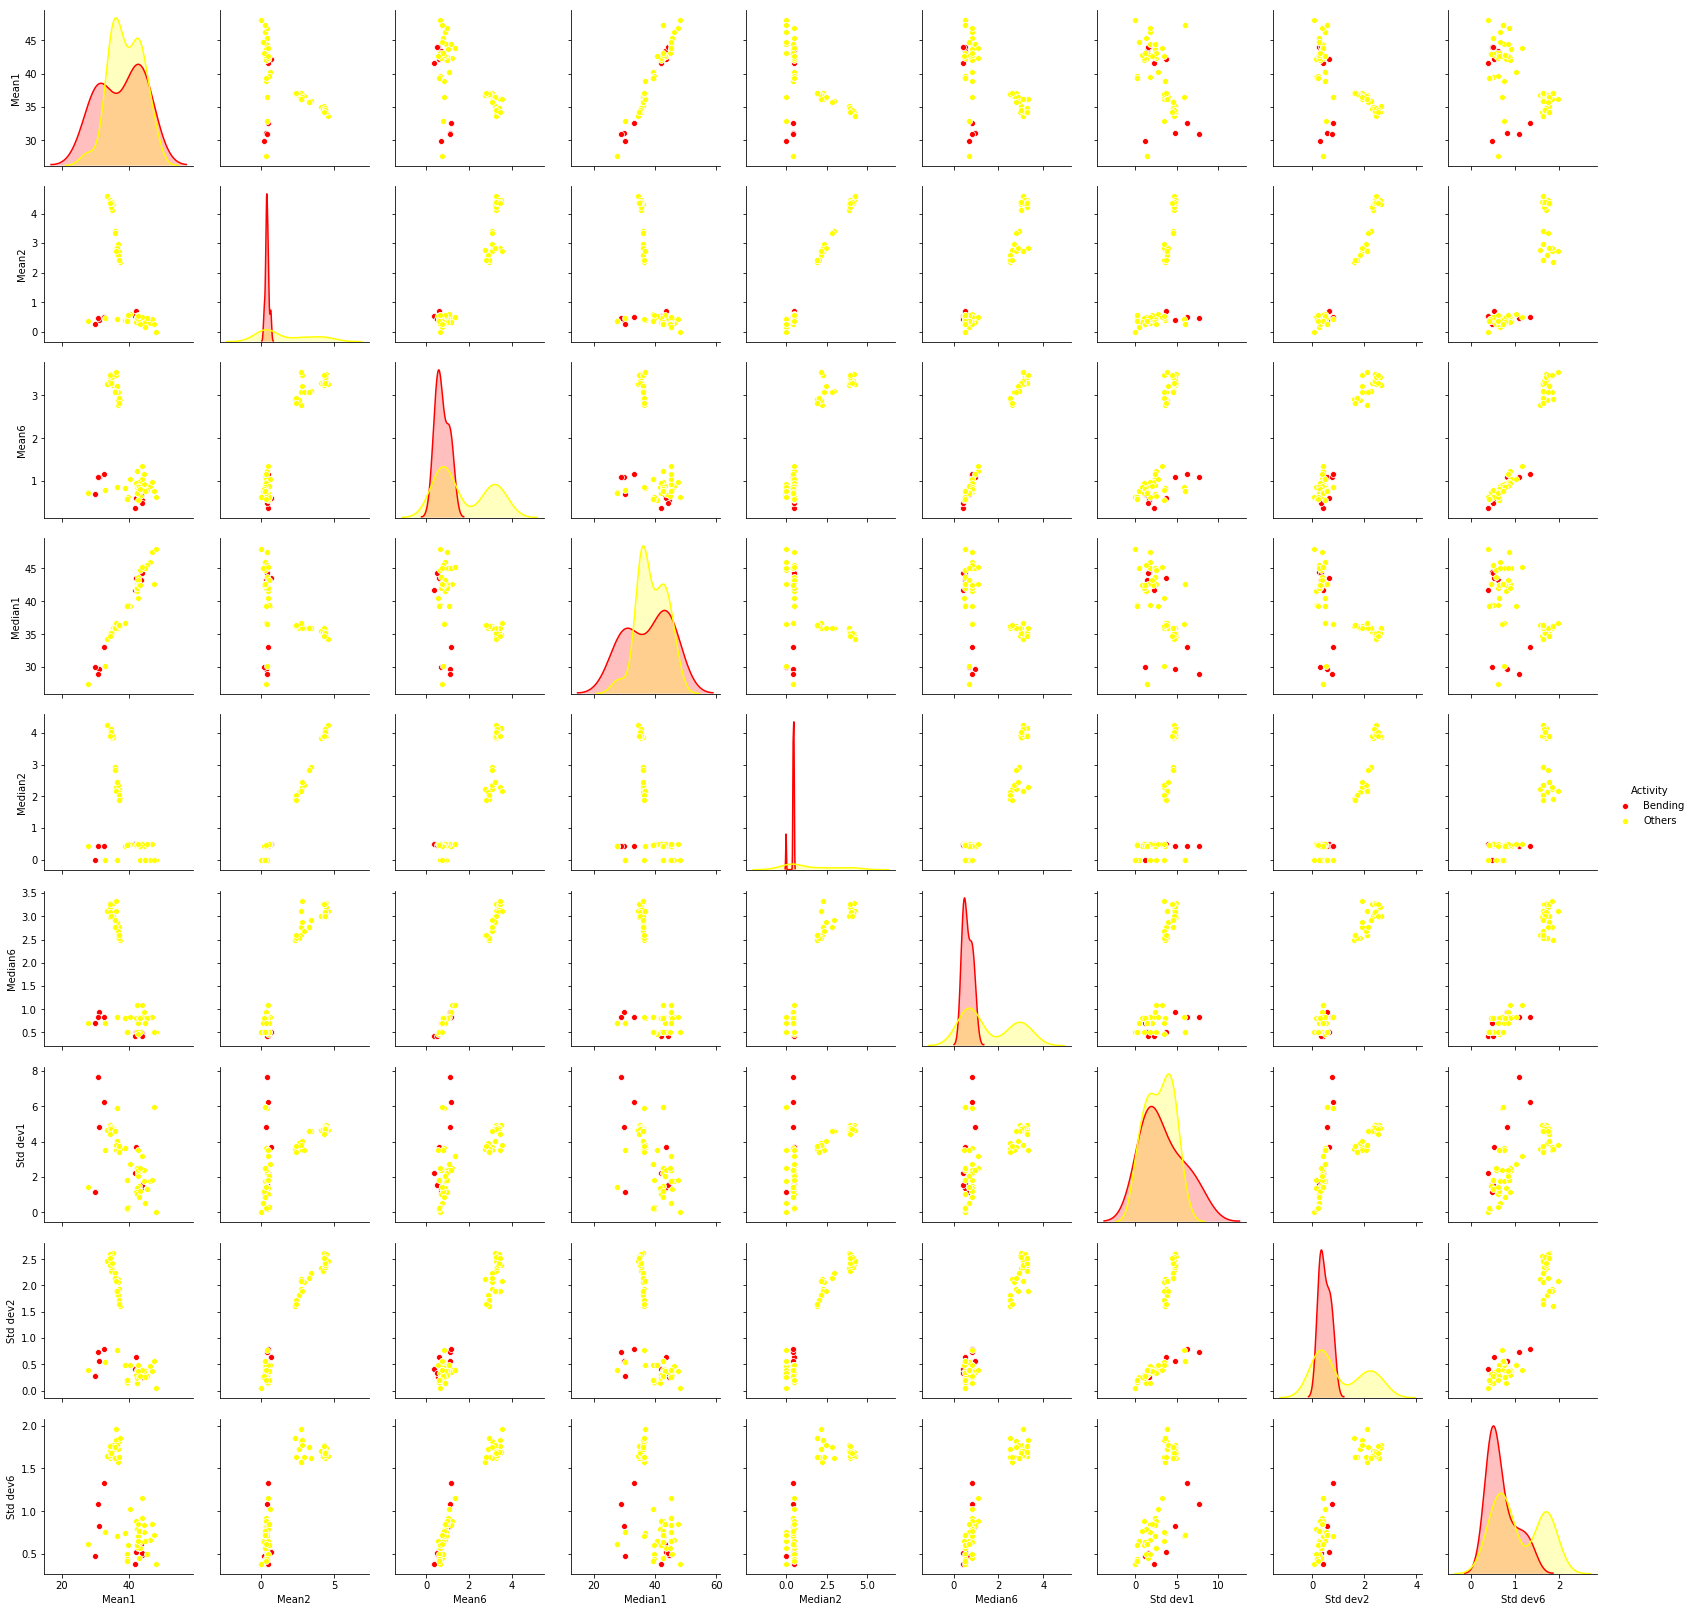

In [18]:
ax=sns.pairplot(sc_plot,hue='Activity',palette=['red','yellow'])

### Solution to 1(d)(ii) as below:

We read each csv and take it as a dataframe. Each of these dataframes is then split into two and then concatenated into a new dataframe with the required 12 time series.

We then create lists and append the time features for time series 1,2 and 12 and create a new dataframe to create the plots. Same approach as d-ii has been used here to create the 'Activity' column.

In [19]:
act2_type=[]
mean_avg_rss12_1=[]
median_avg_rss12_1=[]
std_dev_avg_rss12_1=[]
mean_avg_rss12_2=[]
median_avg_rss12_2=[]
std_dev_avg_rss12_2=[]
mean_var_rss23_2=[]
median_var_rss23_2=[]
std_dev_var_rss23_2=[]

for x in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
    
    df=pd.read_csv(x)
    df1=df.iloc[:240,1:7]
    df1.reset_index(drop=True, inplace=True)
    df2=df.iloc[240:480,1:7]
    df2.reset_index(drop=True, inplace=True)
    df3=pd.concat([df1,df2],axis=1)
    df3.columns=['avg_rss12_1','var_rss12_1','avg_rss13_1','var_rss13_1','avg_rss23_1','var_rss23_1',
            'avg_rss12_2','var_rss12_2','avg_rss13_2','var_rss13_2','avg_rss23_2','var_rss23_2']
    mean_avg_rss12_1.append(df3['avg_rss12_1'].mean())
    median_avg_rss12_1.append(df3['avg_rss12_1'].median())
    std_dev_avg_rss12_1.append(df3['avg_rss12_1'].std())
    
    mean_avg_rss12_2.append(df3['avg_rss12_2'].mean())
    median_avg_rss12_2.append(df3['avg_rss12_2'].median())
    std_dev_avg_rss12_2.append(df3['avg_rss12_2'].std())
    
    mean_var_rss23_2.append(df3['var_rss23_2'].mean())
    median_var_rss23_2.append(df3['var_rss23_2'].median())
    std_dev_var_rss23_2.append(df3['var_rss23_2'].std())
    
    if "bending" in x:
        act2_type.append('Bending')
    else:
        act2_type.append('Others')
        

        
div_sc_plot=pd.DataFrame({'mean_avg_rss12_1':mean_avg_rss12_1,'median_avg_rss12_1':median_avg_rss12_1,
                          'std_dev_avg_rss12_1':std_dev_avg_rss12_1,'mean_avg_rss12_2':mean_avg_rss12_2,
                         'median_avg_rss12_2':median_avg_rss12_2,'std_dev_avg_rss12_2':std_dev_avg_rss12_2,
                            'mean_var_rss23_2':mean_var_rss23_2,'median_var_rss23_2':median_var_rss23_2,
                        'std_dev_var_rss23_2':std_dev_var_rss23_2,'Activity':act2_type})

In [20]:
div_sc_plot.head(10)


,mean_avg_rss12_1,median_avg_rss12_1,std_dev_avg_rss12_1,mean_avg_rss12_2,median_avg_rss12_2,std_dev_avg_rss12_2,mean_var_rss23_2,median_var_rss23_2,std_dev_var_rss23_2,Activity
0,43.486208,43.710,1.281976,44.452042,44.500,1.771251,0.585750,0.500,0.487918,Bending
1,44.117042,45.000,1.359836,42.792875,42.670,1.058792,0.543875,0.500,0.473445,Bending
2,43.278875,45.000,3.473355,41.080750,42.000,3.537481,0.586083,0.470,0.491873,Bending
3,41.621208,42.330,3.118644,41.734917,41.500,0.595920,0.347500,0.430,0.363144,Bending
4,44.057167,44.500,1.556971,43.851833,43.500,1.557168,0.388333,0.000,0.478528,Bending
5,33.886458,34.375,5.143776,34.779625,35.000,4.714249,3.274750,2.955,1.670593,Others
6,34.737042,35.500,4.276717,35.134583,35.585,4.989014,3.225917,3.085,1.665326,Others
7,35.236083,36.000,5.057973,35.150583,35.625,4.434887,3.377333,3.255,1.789178,Others
8,34.966250,35.500,4.733014,34.560417,35.000,4.752584,3.430208,3.350,1.647979,Others
9,33.907292,34.500,4.716603,34.599750,35.625,5.141681,3.547167,3.270,1.740018,Others


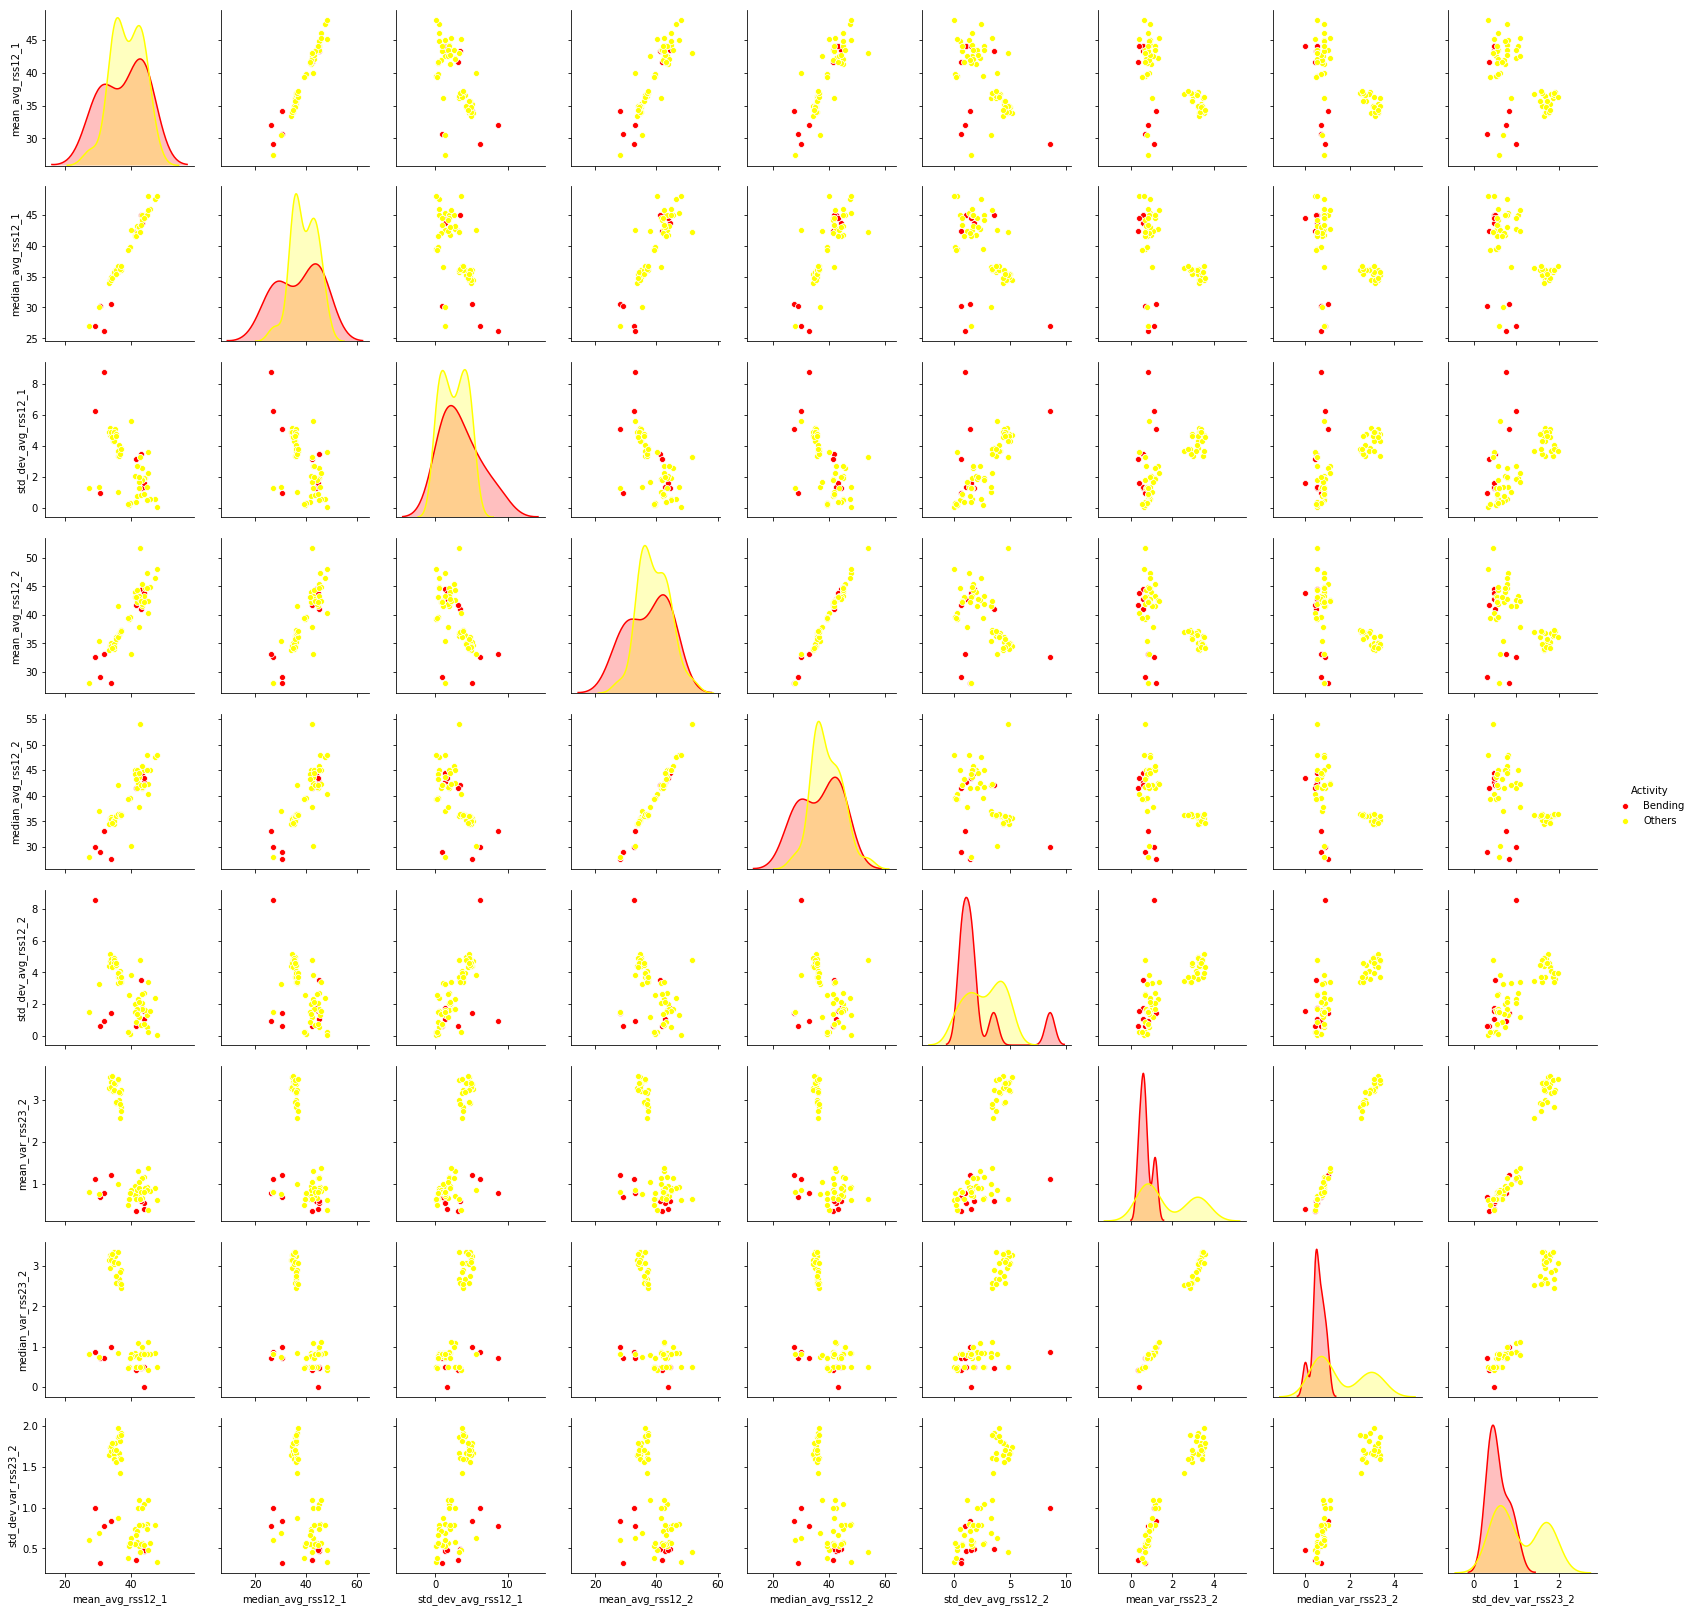

In [21]:
sns.pairplot(div_sc_plot,hue='Activity',palette=['red','yellow'])

There is not much considerable difference. The classes seem imbalanced in both the plots. However, in a few of the plots above, we can see that 'bending' can be classified more easily than in other plots.

### Solution to 1(d)(iii) as below:

We create separate dataframes for each split and then carry out the required functions. Each of these dataframes is split into predictors and response. For each split, we then carry RFECV which does backward stepwise selection and cross validation as well. We fit a logistic regression with a high C value to RFCVE as the estimator in order to remove the penalty. We've used stratified cross validation as well to deal with class imbalance.

The final output shows each split's best no of features and its corresponding CV score

The right way is to first cross validate to find the correct set of features and then cross validate on the classifier with the selected features.

The wrong way is to first select the features without cross validation and then apply cross validation on the classifier with the selected features. This involves cross validation just once.

In [22]:
for j in range(1,21):
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('Bending')
        else:
            act_type.append('Others')
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
      
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df=pd.DataFrame(data_final,columns=column_names)
    X_train=tr_df.iloc[:,0:len(tr_df.columns)-1]
    Y_train=tr_df.iloc[:,len(tr_df.columns)-1]
    Y_train=Y_train.replace({'Bending': 1,'Others': 0})
    clf = LogisticRegression(C=10**9)
    clf_cv = RFECV(clf,cv=StratifiedKFold(5),scoring = 'accuracy')
    clv_cv=clf_cv.fit(X_train, Y_train)
    grid_score=list(clf_cv.grid_scores_)
    
    print("the no of features used for split =",j,"is",clf_cv.n_features_,"and its cv score is",max(grid_score))
   

the no of features used for split = 1 is 8 and its cv score is 0.9571428571428571
the no of features used for split = 2 is 6 and its cv score is 0.9428571428571428
the no of features used for split = 3 is 6 and its cv score is 0.9714285714285715
the no of features used for split = 4 is 5 and its cv score is 0.9571428571428573
the no of features used for split = 5 is 1 and its cv score is 0.9428571428571428
the no of features used for split = 6 is 2 and its cv score is 0.9571428571428571
the no of features used for split = 7 is 4 and its cv score is 0.9714285714285715
the no of features used for split = 8 is 4 and its cv score is 0.9714285714285715
the no of features used for split = 9 is 7 and its cv score is 0.9571428571428571
the no of features used for split = 10 is 8 and its cv score is 0.9714285714285715
the no of features used for split = 11 is 7 and its cv score is 0.9714285714285715
the no of features used for split = 12 is 5 and its cv score is 0.9857142857142858
the no of fea

In [23]:
 print("the best (l,p) pair is : (12,5)")

the best (l,p) pair is : (12,5)


### Solution to d(iv) as below:

Now , we train the data using logistic regression on our chosen split. We choose max_iter = 20 to prevent warning about classes about being perfectly linearly separable and prevent instability as the coefficients tend to infinity.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score


for j in range(12,13):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('Bending')
        else:
            act_type.append('Others')
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
        
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df=pd.DataFrame(data_final,columns=column_names)
    X_train=tr_df.iloc[:,0:len(tr_df.columns)-1]
    Y_train=tr_df.iloc[:,len(tr_df.columns)-1]
    Y_train=Y_train.replace({'Bending': 1,'Others': 0})
    
    clf = LogisticRegression(C=10**9)
    clf_cv = RFECV(clf,cv=StratifiedKFold(5),scoring = 'accuracy')
    clv_cv=clf_cv.fit(X_train, Y_train)

    
    kt=[]
    for x in range(0,len(clf_cv.support_)):
        if clf_cv.support_[x] == True:
            kt.append(x)
    
    X_train_new=X_train.iloc[:,kt] 
    print('the features for the best (l,p) pair are:')
    print('\n')
    print(X_train_new.columns)
    
    classifier=LogisticRegression(C=10**9,max_iter=20).fit(X_train_new,Y_train)
    Y_train_pred=classifier.predict(X_train_new)
    conf=confusion_matrix(Y_train,Y_train_pred)
    

the features for the best (l,p) pair are:


Index(['min_ts11', 'min_ts65', 'max_ts37', 'median_ts11', 'first_q_ts11'], dtype='object')


In [25]:
print("the confusion matrix is :")
print(conf)

the confusion matrix is :
[[60  0]
 [ 0  9]]


In [26]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train,Y_train_pred)
roc_auc = metrics.auc(fpr, tpr)

In [27]:
print("the auc is:",roc_auc)

the auc is: 1.0


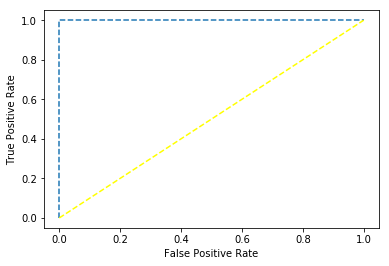

In [28]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [29]:
logit_model=sm.Logit(Y_train,X_train_new).fit(maxiter=20)
print(logit_model.summary())

         Current function value: 0.000000
         Iterations: 20
                           Logit Regression Results                           
Dep. Variable:               Activity   No. Observations:                   69
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            4
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:                   1.000
Time:                        23:04:52   Log-Likelihood:            -2.1470e-07
converged:                      False   LL-Null:                       -26.718
                                        LLR p-value:                 6.909e-11
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
min_ts11         1.4133   1486.090      0.001      0.999   -2911.270    2914.096
min_ts65         1.5813    339.993      0.005      0.996   

The p values for the predictors are all almost 1 due to the classes being linearly separable. The other parameters can be noted from the summary above,

### Solution to d(v) as below:


We follow a similar approach on test data as on train data. We use the logistic regression fit on the training data above for prediction of test data.

confusion matrix is:


[[15  0]
 [ 0  4]]


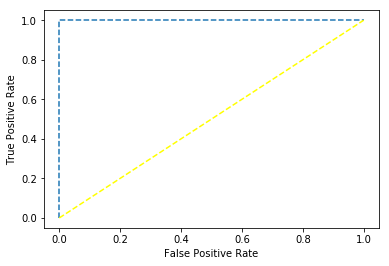

the auc is: 1.0


In [30]:
for j in range(12,13):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/test_data/*/*.csv'):
        act_type=[]
        if "bending" in y:
            act_type.append('Bending')
        else:
            act_type.append('Others')
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
        
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    ts_df=pd.DataFrame(data_final,columns=column_names)
    X_test=ts_df.iloc[:,0:len(ts_df.columns)-1]
    Y_test=ts_df.iloc[:,len(ts_df.columns)-1]
    Y_test=Y_test.replace({'Bending': 1,'Others': 0})
    X_test_new=X_test.iloc[:,kt]
    
    Y_pred_test=classifier.predict(X_test_new)
    
    print("confusion matrix is:")
    print('\n')
    
    print(confusion_matrix(Y_test,Y_pred_test))
    fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_pred_test)
    roc_auc = metrics.auc(fpr, tpr)
    pyplot.plot(fpr, tpr, linestyle='--')
    pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("the auc is:",roc_auc)
    

In [31]:
print("the accuracy is:",accuracy_score(Y_test,Y_pred_test) )


the accuracy is: 1.0


The best CV accuracy comes out to be 0.9857142857142858 while it is 1.0 for logistic regression.

### Solution to d(vi) as below:

Yes, the classes are well-separated to cause instability. There were warnings without using maxiter. Even after setting maxiter to be 30, I was getting warnings. A value around 20 seemed good for this to prevent instability.

### Solution to d(vii) as below:

Yes, we see imbalanced classes from the confusion matrices we built above, especially for the training set. There was a 60:9 ratio for the trainig set while it was 4:15 for the test set.
Hence, we'll use upsampling on the train data. The test data can be left as it is so that it represents the truth and so that correct predictions can be made.

In [32]:
tr_min_bend = tr_df[tr_df['Activity']=="Bending"]
tr_max_oth = tr_df[tr_df['Activity']=='Others']

In [33]:
tr_min_bend.shape

(9, 505)

In [34]:
tr_max_oth.shape

(60, 505)

We upsample the minority class to the size of the majority class by upsampling.

In [35]:
tr_min_bend_upsampled = resample(tr_min_bend,replace=True,n_samples=60)
tr_upsampled = pd.concat([tr_max_oth, tr_min_bend_upsampled])
print(tr_upsampled['Activity'].value_counts())


Bending    60
Others     60
Name: Activity, dtype: int64


In [36]:
tr_upsampled.shape

(120, 505)

The logistic regression model is fit on the train data.

In [37]:
X_train_upsampled=tr_upsampled.iloc[:,0:len(tr_df.columns)-1]
Y_train_upsampled=tr_upsampled.iloc[:,len(tr_df.columns)-1]
Y_train_upsampled=Y_train_upsampled.replace({'Bending': 1,'Others': 0})
X_train_upsampled_new=X_train_upsampled.iloc[:,kt] 
upsampled_classifier=LogisticRegression(C=10**9,max_iter=20).fit(X_train_upsampled_new,Y_train_upsampled)
Y_upsampled_train_pred=upsampled_classifier.predict(X_train_upsampled_new)
conf_upsampled=confusion_matrix(Y_train_upsampled,Y_upsampled_train_pred)

In [38]:
print("confusion matrix was train data is:")
print(conf_upsampled)

confusion matrix was train data is:
[[60  0]
 [ 0 60]]


In [39]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train_upsampled,Y_upsampled_train_pred)
roc_auc = metrics.auc(fpr, tpr)

In [40]:
print("the auc for the curve is:",roc_auc)

the auc for the curve is: 1.0


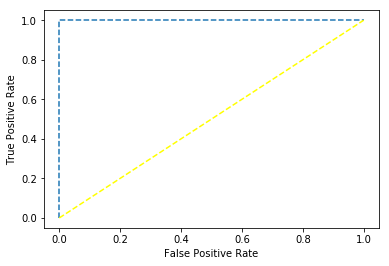

In [41]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr,linestyle='--')
pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

We see that the classes are still linearly separable, but they are no longer imbalanced due to the upsampling carried out.

Let's test the accuracy of the model after upsampling. Note: we do not upsample the test set so that it continues to reflect the imbalance.

these stats and figures are for the test data:
confusion matrix is:


[[15  0]
 [ 0  4]]


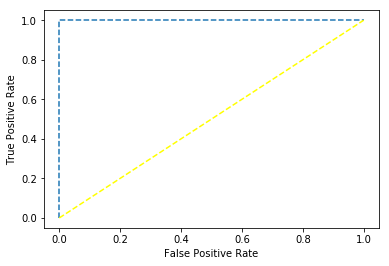

the auc is: 1.0


In [42]:
print("these stats and figures are for the test data:")
Y_upsampled_pred_test=upsampled_classifier.predict(X_test_new)
print("confusion matrix is:")
print('\n')
    
print(confusion_matrix(Y_test,Y_upsampled_pred_test))
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_upsampled_pred_test)
roc_auc = metrics.auc(fpr, tpr)
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()
print("the auc is:",roc_auc)

In [43]:
accuracy_score(Y_test,Y_upsampled_pred_test) 

1.0

### Solution to e(i) as below:

We follow the same approach as before for splitting. Additionally, we normalize our data. 

We first use GridSearchCV to find the best value of C for each split. We've passed a list of C values to be calculated upon. Then each C is fitted into L1 penalized logistic regression model.Cross validation is performed on each of these models and then we choose the split with the highest CV score.

In [44]:

for j in range(1,21):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('Bending')
        else:
            act_type.append('Others')
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
        
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df=pd.DataFrame(data_final,columns=column_names)
    
    tr_df=tr_df.replace({'Bending': 1,'Others': 0})
    

    xy = tr_df.values 
    xy_scaler = preprocessing.MinMaxScaler()
    xy_scaled = xy_scaler.fit_transform(xy)
    l1_tr_df = pd.DataFrame(xy_scaled)
    
    
    l1_X_train=l1_tr_df.iloc[:,0:len(l1_tr_df.columns)-1]
    l1_Y_train=l1_tr_df.iloc[:,len(l1_tr_df.columns)-1]
    
    l1_clf = LogisticRegression(penalty='l1',solver='liblinear')
    
    parameters = {'C':[1e-15,1e-10,1e-5,1e-2,1e-1,1,2,5,10,15]}
    lasso_clf=GridSearchCV(l1_clf,parameters,cv=StratifiedKFold(5))
    lassop_clf=lasso_clf.fit(l1_X_train, l1_Y_train)
   
    best_score=lassop_clf.best_params_['C']
    
    logreg_bestC = LogisticRegression(penalty='l1',C=best_score,solver='liblinear')
    
    cross_val_score_=cross_val_score(logreg_bestC,l1_X_train,l1_Y_train, cv=StratifiedKFold(5)).mean()
    print("The Best C or budget for split",j,"is",best_score,"and the model gives a CV score of",cross_val_score_,"after fitting it to this C")
     
    

The Best C or budget for split 1 is 2 and the model gives a CV score of 0.9571428571428571 after fitting it to this C
The Best C or budget for split 2 is 5 and the model gives a CV score of 0.9571428571428571 after fitting it to this C
The Best C or budget for split 3 is 5 and the model gives a CV score of 0.9428571428571428 after fitting it to this C
The Best C or budget for split 4 is 2 and the model gives a CV score of 0.9417582417582417 after fitting it to this C
The Best C or budget for split 5 is 10 and the model gives a CV score of 0.9428571428571428 after fitting it to this C
The Best C or budget for split 6 is 5 and the model gives a CV score of 0.9571428571428571 after fitting it to this C
The Best C or budget for split 7 is 10 and the model gives a CV score of 0.9285714285714285 after fitting it to this C
The Best C or budget for split 8 is 5 and the model gives a CV score of 0.9274725274725275 after fitting it to this C
The Best C or budget for split 9 is 10 and the model g

We get multiple best (l,C) pairs here with the highest values. We choose choose split 1 with c=2(the (1,2) pair)
Now fit the classifier on split 1 data with l1 penalty and C=2.

### Solution to e(ii) as below:

In [45]:
for j in range(1,2):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('Bending')
        else:
            act_type.append('Others')
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
        
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            #print(dic_df[key])
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df=pd.DataFrame(data_final,columns=column_names)
    tr_df=tr_df.replace({'Bending': 1,'Others': 0})
    

    xy = tr_df.values 
    xy_scaler = preprocessing.MinMaxScaler()
    xy_scaled = xy_scaler.fit_transform(xy)
    l1_tr_df = pd.DataFrame(xy_scaled)
    
    
    l1_X_train=l1_tr_df.iloc[:,0:len(l1_tr_df.columns)-1]
    l1_Y_train=l1_tr_df.iloc[:,len(l1_tr_df.columns)-1]
    
    l1_clf_best = LogisticRegression(penalty='l1',C=2,solver='liblinear').fit(l1_X_train, l1_Y_train)
    
    k=[]
    t=l1_clf_best.coef_.tolist()
    
    t=t[0]
    for x in range(0,len(t)):
        if t[x]!=0:
            k.append(x)
    features=X_train.iloc[:,k]
    print("the features selected for best (l,C) pairing are:",features.columns) 
    
    
    Y_train_pred_best=l1_clf_best.predict(l1_X_train)
    conf_best=confusion_matrix(l1_Y_train,Y_train_pred_best)
    
    print("the confusion matrix for train data:")
    print('\n')
    print(conf_best)
   

the features selected for best (l,C) pairing are: Index(['min_ts5', 'min_ts11', 'min_ts13', 'min_ts36', 'min_ts37'], dtype='object')
the confusion matrix for train data:


[[60  0]
 [ 2  7]]


In [46]:
len(t)

42

the ROC plot for train data is:


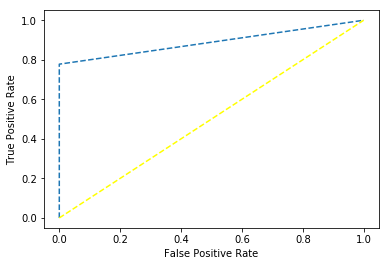

In [47]:
print("the ROC plot for train data is:")
fpr, tpr, thresholds = metrics.roc_curve(l1_Y_train,Y_train_pred_best)
roc_auc = metrics.auc(fpr, tpr)
from matplotlib import pyplot
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [48]:
print("the auc for train set is:",roc_auc)

the auc for train set is: 0.8888888888888888


these stats and figures are for the test set:
confusion matrix is:


[[15  0]
 [ 0  4]]


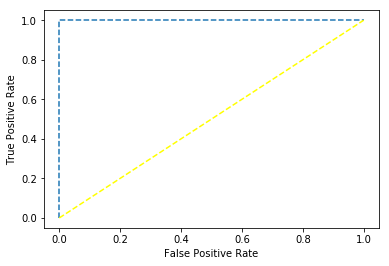

the auc is 1.0
the accuracy is : 1.0


In [49]:
for j in range(1,2):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/test_data/*/*.csv'):
        act_type=[]
        if "bending" in y:
            act_type.append('Bending')
        else:
            act_type.append('Others')
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
       
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
           
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    

    
    ts_df=pd.DataFrame(data_final,columns=column_names)
    ts_df=ts_df.replace({'Bending': 1,'Others': 0})
    
    xy_ts = ts_df.values 
    xy_scaler_ts = preprocessing.MinMaxScaler()
    xy_scaled_ts = xy_scaler_ts.fit_transform(xy_ts)
    l1_ts_df = pd.DataFrame(xy_scaled_ts)
    
    
    l1_X_test=l1_ts_df.iloc[:,0:len(l1_ts_df.columns)-1]
    l1_Y_test=l1_ts_df.iloc[:,len(l1_ts_df.columns)-1]
    Y_test_pred_best=l1_clf_best.predict(l1_X_test)
    print("these stats and figures are for the test set:")
    print("confusion matrix is:")
    print('\n')
    
    print(confusion_matrix(l1_Y_test,Y_test_pred_best))
    fpr, tpr, thresholds = metrics.roc_curve(l1_Y_test,Y_test_pred_best)
    roc_auc = metrics.auc(fpr, tpr)
    pyplot.plot(fpr, tpr, linestyle='--')
    pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("the auc is",roc_auc)
    
    
    print("the accuracy is :",accuracy_score(l1_Y_test,Y_test_pred_best))

We see that both the models have the same accuracy.
Let's compare across other parameters as well with the help of classification report.

In [50]:
from sklearn.metrics import classification_report
cr1=classification_report(Y_test,Y_pred_test, target_names=['Bending','Others'])
print("classification report for P value variable selection:")
print(cr1)
print('\n')
cr2=classification_report(l1_Y_test, Y_test_pred_best, target_names=['Bending','Others'])
print("classification report for L1-penalized variable selection")
print(cr2)
              

classification report for P value variable selection:
              precision    recall  f1-score   support

     Bending       1.00      1.00      1.00        15
      Others       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



classification report for L1-penalized variable selection
              precision    recall  f1-score   support

     Bending       1.00      1.00      1.00        15
      Others       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



We see that their classification reports are same as well. Hence, we can see that both the models perform equally. L1 penalized logistic regression was easier to implement as packages calculated cross validation for lambda automatically. Also, we did not have to pass maxiter parameter here. For the RFECV case with logistic regression, we had to try different values of maxiter and check which one prevented instability and did not give errors.

### Solution to 1(f)(i) as below:

We follow the same approach as above for getting the splits and the models. Since it is multiclass, we assign an integer to each class.

In [51]:
for j in range(1,21):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('bending')
        elif "cycling" in y :
            act_type.append('cycling')
        elif "lying" in y :
            act_type.append('lying')
        elif "sitting" in y :
            act_type.append('sitting')
        elif "standing" in y :
            act_type.append('standing')
        else:
            act_type.append('walking')
            
        
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
       
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df_mul=pd.DataFrame(data_final,columns=column_names)
    
    tr_df_mul=tr_df_mul.replace({'bending': 0,'cycling': 1,'lying':2,'sitting':3,'standing':4,'walking':5})
    
    l1_X_train_mul=tr_df_mul.iloc[:,0:len(tr_df_mul.columns)-1]
    l1_Y_train_mul=tr_df_mul.iloc[:,len(tr_df_mul.columns)-1]
    
    xy_mul = l1_X_train_mul.values 
    xy_scaler_mul = preprocessing.MinMaxScaler()
    xy_scaled_mul = xy_scaler_mul.fit_transform(xy_mul)
    l1_X_train_mul_new = pd.DataFrame(xy_scaled_mul)
    
    
    
    
    l1_clf_mul = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial')
    
    
    parameters = {'C':[1e-15,1e-10,1e-5,1e-2,1e-1,1,2,5,10,15]}
    lasso_clf_mul=GridSearchCV(l1_clf_mul,parameters,cv=StratifiedKFold(5))
    lassop_clf_mul=lasso_clf_mul.fit(l1_X_train_mul_new, l1_Y_train_mul)
   
    best_score_mul=lassop_clf_mul.best_params_['C']
    logreg_bestC_mul = LogisticRegression(penalty='l1', C=best_score_mul, solver='saga',multi_class='multinomial')
    cross_val_score_mul=cross_val_score(logreg_bestC_mul,l1_X_train_mul_new,l1_Y_train_mul, cv=StratifiedKFold(5)).mean()
    print("The Best C or budget for split",j,"is",best_score_mul,"and the model gives a CV score of",cross_val_score_mul,"after fitting it to this C")
     
    

The Best C or budget for split 1 is 5 and the model gives a CV score of 0.8847593582887701 after fitting it to this C
The Best C or budget for split 2 is 5 and the model gives a CV score of 0.8960784313725491 after fitting it to this C
The Best C or budget for split 3 is 1 and the model gives a CV score of 0.8563279857397503 after fitting it to this C
The Best C or budget for split 4 is 10 and the model gives a CV score of 0.8411764705882353 after fitting it to this C
The Best C or budget for split 5 is 15 and the model gives a CV score of 0.8680926916221035 after fitting it to this C
The Best C or budget for split 6 is 5 and the model gives a CV score of 0.8411764705882353 after fitting it to this C
The Best C or budget for split 7 is 10 and the model gives a CV score of 0.8112299465240641 after fitting it to this C
The Best C or budget for split 8 is 2 and the model gives a CV score of 0.8214795008912656 after fitting it to this C
The Best C or budget for split 9 is 2 and the model g

We choose the best (l,C) pair which is (2,2) in this case.

In [52]:

for j in range(2,3):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('bending')
        elif "cycling" in y :
            act_type.append('cycling')
        elif "lying" in y :
            act_type.append('lying')
        elif "sitting" in y :
            act_type.append('sitting')
        elif "standing" in y :
            act_type.append('standing')
        else:
            act_type.append('walking')
            
        
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
     
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df_mul=pd.DataFrame(data_final,columns=column_names)
    
    tr_df_mul=tr_df_mul.replace({'bending': 0,'cycling': 1,'lying':2,'sitting':3,'standing':4,'walking':5})
    
    l1_X_train_mul=tr_df_mul.iloc[:,0:len(tr_df_mul.columns)-1]
    l1_Y_train_mul=tr_df_mul.iloc[:,len(tr_df_mul.columns)-1]
    
    xy_mul = l1_X_train_mul.values 
    xy_scaler_mul = preprocessing.MinMaxScaler()
    xy_scaled_mul = xy_scaler_mul.fit_transform(xy_mul)
    l1_X_train_mul_new = pd.DataFrame(xy_scaled_mul)
    
    l1_clf_m=LogisticRegression(penalty='l1',C=2,solver='saga',multi_class='multinomial')
    l1_clf_mul = l1_clf_m.fit(l1_X_train_mul_new,l1_Y_train_mul)
    
    
    Y_train_pred_mul=l1_clf_mul.predict(l1_X_train_mul_new)
    
    conf_best_t=confusion_matrix(l1_Y_train_mul,Y_train_pred_mul)
    
    print("the confusion matrix for train data is:")
    print('\n')
    print(conf_best_t)
    

the confusion matrix for train data is:


[[ 7  0  1  1  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 11  1  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


In [53]:
for j in range(2,3):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/test_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('bending')
        elif "cycling" in y :
            act_type.append('cycling')
        elif "lying" in y :
            act_type.append('lying')
        elif "sitting" in y :
            act_type.append('sitting')
        elif "standing" in y :
            act_type.append('standing')
        else:
            act_type.append('walking')
            
        
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
      
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    ts_df_mul=pd.DataFrame(data_final,columns=column_names)
    
    ts_df_mul=ts_df_mul.replace({'bending': 0,'cycling': 1,'lying':2,'sitting':3,'standing':4,'walking':5})
    
    l1_X_test_mul=ts_df_mul.iloc[:,0:len(ts_df_mul.columns)-1]
    l1_Y_test_mul=ts_df_mul.iloc[:,len(ts_df_mul.columns)-1]
    
    xy_mul_ts = l1_X_test_mul.values 
    xy_scaler_mul_ts = preprocessing.MinMaxScaler()
    xy_scaled_mul_ts = xy_scaler_mul_ts.fit_transform(xy_mul_ts)
    l1_X_test_mul_new = pd.DataFrame(xy_scaled_mul_ts)
    
    Y_test_pred_mul=l1_clf_mul.predict(l1_X_test_mul_new)
    
    
    
    print("the accuracy of the model is:",accuracy_score(l1_Y_test_mul,Y_test_pred_mul))
    
    
    conf_best_ts=confusion_matrix(l1_Y_test_mul,Y_test_pred_mul)
    
    print("the confusion matrix for test data is:")
    print('\n')
    print(conf_best_ts)
   

the accuracy of the model is: 0.7368421052631579
the confusion matrix for test data is:


[[3 0 0 1 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [1 0 0 0 2 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


In [54]:
cr3=classification_report(l1_Y_test_mul,Y_test_pred_mul,target_names=['bending','cycling','lying','sitting','standing','walking'])
print("classification report for Multinomial regression:")
print(cr3)

classification report for Multinomial regression:
              precision    recall  f1-score   support

     bending       0.75      0.75      0.75         4
     cycling       1.00      1.00      1.00         3
       lying       1.00      1.00      1.00         3
     sitting       0.00      0.00      0.00         3
    standing       0.50      0.67      0.57         3
     walking       1.00      1.00      1.00         3

   micro avg       0.74      0.74      0.74        19
   macro avg       0.71      0.74      0.72        19
weighted avg       0.71      0.74      0.72        19



In [55]:
print("test error is:",1-(accuracy_score(l1_Y_test_mul,Y_test_pred_mul)))

test error is: 0.26315789473684215


I've used this link to get help with this question:https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y = label_binarize(l1_Y_test_mul, classes=[0,1,2,3,4,5])
n_classes = y.shape[1]

classifier = OneVsRestClassifier(l1_clf_m)
y_score = classifier.fit(l1_X_train_mul_new,l1_Y_train_mul).decision_function(l1_X_test_mul_new)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], p= roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

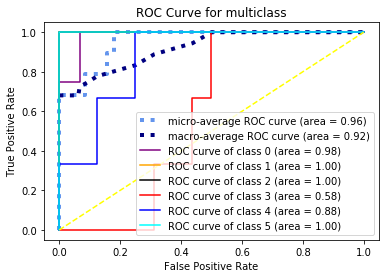

In [57]:
import matplotlib.pyplot as plt


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='cornflowerblue', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['purple', 'orange', 'black','red','blue','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1],linestyle='--',color='yellow')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multiclass')
plt.legend(loc="lower right")
plt.show()

### Solution to 1(f)(ii) as below:

The approach here is same. The only difference here is that we are fitting a Gaussian Naive Bayes and Multinomial Naive Bayes. We will first do Gaussian.

In [58]:
for j in range(1,21):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('bending')
        elif "cycling" in y :
            act_type.append('cycling')
        elif "lying" in y :
            act_type.append('lying')
        elif "sitting" in y :
            act_type.append('sitting')
        elif "standing" in y :
            act_type.append('standing')
        else:
            act_type.append('walking')
            
        
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
   
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df_nav=pd.DataFrame(data_final,columns=column_names)
    
    tr_df_nav=tr_df_nav.replace({'bending': 0,'cycling': 1,'lying':2,'sitting':3,'standing':4,'walking':5})
    
    l1_X_train_nav=tr_df_nav.iloc[:,0:len(tr_df_nav.columns)-1]
    l1_Y_train_nav=tr_df_nav.iloc[:,len(tr_df_nav.columns)-1]
    
    xy_nav = l1_X_train_nav.values
    xy_scaler_nav = preprocessing.MinMaxScaler()
    xy_scaled_nav = xy_scaler_nav.fit_transform(xy_nav)
    l1_X_train_nav_new = pd.DataFrame(xy_scaled_nav)
    
    l1_clf_nav = GaussianNB()
    cross_val_score_nav=cross_val_score(l1_clf_nav,l1_X_train_nav_new,l1_Y_train_nav, cv=StratifiedKFold(5)).mean()
    print("The CV score for split",j,"is",cross_val_score_nav)
     
    

The CV score for split 1 is 0.8002673796791445
The CV score for split 2 is 0.8494652406417111
The CV score for split 3 is 0.7042780748663102
The CV score for split 4 is 0.6390374331550801
The CV score for split 5 is 0.7209447415329768
The CV score for split 6 is 0.6625668449197861
The CV score for split 7 is 0.6694295900178253
The CV score for split 8 is 0.727807486631016
The CV score for split 9 is 0.6762923351158645
The CV score for split 10 is 0.6174688057040998
The CV score for split 11 is 0.6694295900178252
The CV score for split 12 is 0.5890374331550803
The CV score for split 13 is 0.6807486631016044
The CV score for split 14 is 0.6694295900178252
The CV score for split 15 is 0.6008021390374332
The CV score for split 16 is 0.624331550802139
The CV score for split 17 is 0.5679144385026738
The CV score for split 18 is 0.5777183600713013
The CV score for split 19 is 0.520855614973262
The CV score for split 20 is 0.6008021390374332


The best split is the one which gives the highest CV score. So we choose split 2 here.

In [59]:
for j in range(2,3):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('bending')
        elif "cycling" in y :
            act_type.append('cycling')
        elif "lying" in y :
            act_type.append('lying')
        elif "sitting" in y :
            act_type.append('sitting')
        elif "standing" in y :
            act_type.append('standing')
        else:
            act_type.append('walking')
            
        
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
        
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df_nav=pd.DataFrame(data_final,columns=column_names)
    
    tr_df_nav=tr_df_nav.replace({'bending': 0,'cycling': 1,'lying':2,'sitting':3,'standing':4,'walking':5})
    
    l1_X_train_nav=tr_df_nav.iloc[:,0:len(tr_df_nav.columns)-1]
    l1_Y_train_nav=tr_df_nav.iloc[:,len(tr_df_nav.columns)-1]
    
    xy_nav = l1_X_train_nav.values
    xy_scaler_nav = preprocessing.MinMaxScaler()
    xy_scaled_nav = xy_scaler_nav.fit_transform(xy_nav)
    l1_X_train_nav_new = pd.DataFrame(xy_scaled_nav)
    
    l1_clf_n = GaussianNB()
    l1_clf_nav=l1_clf_n.fit(l1_X_train_nav_new,l1_Y_train_nav)

    Y_train_pred_nav=l1_clf_nav.predict(l1_X_train_nav_new)
    
    conf_best_nav=confusion_matrix(l1_Y_train_nav,Y_train_pred_nav)
    
    print("the confusion matrix for train set:")
    print('\n')
    print(conf_best_nav)

the confusion matrix for train set:


[[ 8  0  1  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


In [60]:
for j in range(2,3):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/test_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('bending')
        elif "cycling" in y :
            act_type.append('cycling')
        elif "lying" in y :
            act_type.append('lying')
        elif "sitting" in y :
            act_type.append('sitting')
        elif "standing" in y :
            act_type.append('standing')
        else:
            act_type.append('walking')
            
        
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
       
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    ts_df_nav=pd.DataFrame(data_final,columns=column_names)
    
    ts_df_nav=ts_df_nav.replace({'bending': 0,'cycling': 1,'lying':2,'sitting':3,'standing':4,'walking':5})
    
    l1_X_test_nav=ts_df_nav.iloc[:,0:len(ts_df_nav.columns)-1]
    l1_Y_test_nav=ts_df_nav.iloc[:,len(ts_df_nav.columns)-1]
    
    xy_nav_ts = l1_X_test_nav.values 
    xy_scaler_nav_ts = preprocessing.MinMaxScaler()
    xy_scaled_nav_ts = xy_scaler_nav_ts.fit_transform(xy_nav_ts)
    l1_X_test_nav_new = pd.DataFrame(xy_scaled_nav_ts)
    
    Y_test_pred_nav=l1_clf_nav.predict(l1_X_test_nav_new)
    
    
    
    print("the accuracy of the model is:",accuracy_score(l1_Y_test_nav,Y_test_pred_nav))
    conf_best_ts2=confusion_matrix(l1_Y_test_nav,Y_test_pred_nav)
    
    print("the confusion matrix for test data is:")
    print('\n')
    print(conf_best_ts2)
    

the accuracy of the model is: 0.5789473684210527
the confusion matrix for test data is:


[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [3 0 0 0 0 0]
 [1 0 0 2 0 0]
 [0 2 0 0 0 1]]


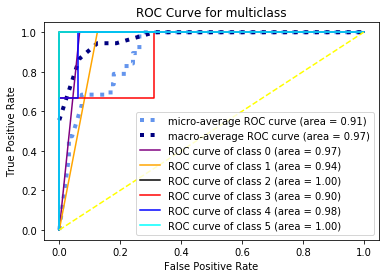

In [61]:
import matplotlib.pyplot as plt


y = label_binarize(l1_Y_test_nav, classes=[0,1,2,3,4,5])
n_classes = y.shape[1]

classifier = OneVsRestClassifier(l1_clf_n)
y_score = classifier.fit(l1_X_train_nav_new,l1_Y_train_nav).predict_proba(l1_X_test_nav_new)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], p= roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='cornflowerblue', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['purple', 'orange', 'black','red','blue','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1],linestyle='--',color='yellow')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multiclass')
plt.legend(loc="lower right")
plt.show()

In [62]:
cr4=classification_report(l1_Y_test_nav,Y_test_pred_nav,target_names=['bending','cycling','lying','sitting','standing','walking'])
print("classification report for Gaussian Naive Bayes' classifier:")
print(cr4)
print("test error is:",1-(accuracy_score(l1_Y_test_nav,Y_test_pred_nav)))

classification report for Gaussian Naive Bayes' classifier:
              precision    recall  f1-score   support

     bending       0.50      1.00      0.67         4
     cycling       0.60      1.00      0.75         3
       lying       1.00      1.00      1.00         3
     sitting       0.00      0.00      0.00         3
    standing       0.00      0.00      0.00         3
     walking       1.00      0.33      0.50         3

   micro avg       0.58      0.58      0.58        19
   macro avg       0.52      0.56      0.49        19
weighted avg       0.52      0.58      0.50        19

test error is: 0.42105263157894735


This is Multinomial Naive Bayes:

In [63]:
for j in range(1,21):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('bending')
        elif "cycling" in y :
            act_type.append('cycling')
        elif "lying" in y :
            act_type.append('lying')
        elif "sitting" in y :
            act_type.append('sitting')
        elif "standing" in y :
            act_type.append('standing')
        else:
            act_type.append('walking')
            
        
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
       
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
           
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df_nav_m=pd.DataFrame(data_final,columns=column_names)
    
    tr_df_nav_m=tr_df_nav_m.replace({'bending': 0,'cycling': 1,'lying':2,'sitting':3,'standing':4,'walking':5})
    
    l1_X_train_nav_m=tr_df_nav_m.iloc[:,0:len(tr_df_nav_m.columns)-1]
    l1_Y_train_nav_m=tr_df_nav_m.iloc[:,len(tr_df_nav_m.columns)-1]
    
    xy_nav_m = l1_X_train_nav_m.values
    xy_scaler_nav_m = preprocessing.MinMaxScaler()
    xy_scaled_nav_m = xy_scaler_nav_m.fit_transform(xy_nav_m)
    l1_X_train_nav_m_new = pd.DataFrame(xy_scaled_nav_m)
    l1_clf_nav_m = MultinomialNB()
    

    cross_val_score_nav_m=cross_val_score(l1_clf_nav_m,l1_X_train_nav_m_new,l1_Y_train_nav_m, cv=StratifiedKFold(5)).mean()
    print("The CV score for split",j,"is",cross_val_score_nav)
     

The CV score for split 1 is 0.6008021390374332
The CV score for split 2 is 0.6008021390374332
The CV score for split 3 is 0.6008021390374332
The CV score for split 4 is 0.6008021390374332
The CV score for split 5 is 0.6008021390374332
The CV score for split 6 is 0.6008021390374332
The CV score for split 7 is 0.6008021390374332
The CV score for split 8 is 0.6008021390374332
The CV score for split 9 is 0.6008021390374332
The CV score for split 10 is 0.6008021390374332
The CV score for split 11 is 0.6008021390374332
The CV score for split 12 is 0.6008021390374332
The CV score for split 13 is 0.6008021390374332
The CV score for split 14 is 0.6008021390374332
The CV score for split 15 is 0.6008021390374332
The CV score for split 16 is 0.6008021390374332
The CV score for split 17 is 0.6008021390374332
The CV score for split 18 is 0.6008021390374332
The CV score for split 19 is 0.6008021390374332
The CV score for split 20 is 0.6008021390374332


The best split is the one which gives the highest CV score. So we choose split 1 here.

In [64]:
for j in range(1,2):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/train_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('bending')
        elif "cycling" in y :
            act_type.append('cycling')
        elif "lying" in y :
            act_type.append('lying')
        elif "sitting" in y :
            act_type.append('sitting')
        elif "standing" in y :
            act_type.append('standing')
        else:
            act_type.append('walking')
            
        
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
      
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
            
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    tr_df_nav_m=pd.DataFrame(data_final,columns=column_names)
    
    tr_df_nav_m=tr_df_nav_m.replace({'bending': 0,'cycling': 1,'lying':2,'sitting':3,'standing':4,'walking':5})
    
    l1_X_train_nav_m=tr_df_nav_m.iloc[:,0:len(tr_df_nav_m.columns)-1]
    l1_Y_train_nav_m=tr_df_nav_m.iloc[:,len(tr_df_nav_m.columns)-1]
    
    xy_nav_m = l1_X_train_nav_m.values
    xy_scaler_nav_m = preprocessing.MinMaxScaler()
    xy_scaled_nav_m = xy_scaler_nav_m.fit_transform(xy_nav_m)
    l1_X_train_nav_m_new = pd.DataFrame(xy_scaled_nav_m)
    
    l1_clf_nav_m = MultinomialNB()
    l1_clf_nav_mul=l1_clf_nav_m.fit(l1_X_train_nav_m_new,l1_Y_train_nav_m)

    Y_train_pred_nav_m=l1_clf_nav_mul.predict(l1_X_train_nav_m_new)
    
    conf_best_nav_m=confusion_matrix(l1_Y_train_nav_m,Y_train_pred_nav_m)
    
    print("the confusion matrix for train set:")
    print('\n')
    print(conf_best_nav_m)

the confusion matrix for train set:


[[ 4  0  0  4  1  0]
 [ 0 12  0  0  0  0]
 [ 0  2  7  0  3  0]
 [ 0  0  1  8  3  0]
 [ 0  0  0  2 10  0]
 [ 0  0  0  0  0 12]]


In [65]:
for j in range(1,2):
    
    data_final=[]
    for y in glob.glob('/Users/sharadsharma/Downloads/AReM/test_data/*/*.csv'):
        
        act_type=[]
        if "bending" in y:
            act_type.append('bending')
        elif "cycling" in y :
            act_type.append('cycling')
        elif "lying" in y :
            act_type.append('lying')
        elif "sitting" in y :
            act_type.append('sitting')
        elif "standing" in y :
            act_type.append('standing')
        else:
            act_type.append('walking')
            
        
        dfs=pd.read_csv(y)
        dfs=dfs.iloc[:,1:7]
        main_df=pd.DataFrame()
        for x,df in dfs.groupby(np.arange(len(dfs)) // (480//j)):
            df.reset_index(drop=True, inplace=True)
            dfx=pd.concat([main_df,df],axis=1)
            main_df=dfx
        
       
        min_ts=list(dfx.min())
        max_ts=list(dfx.max())
        mean_ts=list(dfx.mean())
        median_ts=list(dfx.median())
        stddev_ts=list(dfx.std())
        first_q=list(dfx.quantile(0.25))
        third_q=list(dfx.quantile(0.75))
        
        
        tot=[]
        tot.extend(min_ts)
        tot.extend(max_ts)
        tot.extend(mean_ts)
        tot.extend(median_ts)
        tot.extend(stddev_ts)
        tot.extend(first_q)
        tot.extend(third_q)
        dic_df = {}
        
        for i in range(1,(6*j)+1):
            dic_df['min_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['max_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['mean_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['median_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['stddev_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['first_q_ts'+str(i)] = []
        for i in range(1,(6*j)+1):
            dic_df['third_q_ts'+str(i)] = []
        x=0
        data=[]
        for key,value in dic_df.items():
            dic_df[key].append(tot[x])
           
            data.extend(dic_df[key])
            x=x+1
        
        data.extend(act_type)
        data_final.append(data)
       

    column_names=[]
    for x in range(1,(6*j)+1):
        column_names.append("min_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("max_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("mean_dev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("median_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("stddev_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("first_q_ts"+str(x))
    for x in range(1,(6*j)+1):
        column_names.append("third_q_ts"+str(x))
    column_names.append("Activity")
    
    ts_df_nav_m=pd.DataFrame(data_final,columns=column_names)
    
    ts_df_nav_m=ts_df_nav_m.replace({'bending': 0,'cycling': 1,'lying':2,'sitting':3,'standing':4,'walking':5})
    
    l1_X_test_nav_m=ts_df_nav_m.iloc[:,0:len(ts_df_nav_m.columns)-1]
    l1_Y_test_nav_m=ts_df_nav_m.iloc[:,len(ts_df_nav_m.columns)-1]
    
    xy_nav_ts_m = l1_X_test_nav_m.values 
    xy_scaler_nav_ts_m = preprocessing.MinMaxScaler()
    xy_scaled_nav_ts_m = xy_scaler_nav_ts_m.fit_transform(xy_nav_ts_m)
    l1_X_test_nav_m_new = pd.DataFrame(xy_scaled_nav_ts_m)
    
    Y_test_pred_nav_m=l1_clf_nav_mul.predict(l1_X_test_nav_m_new)
    
    
    print("the accuracy of the model is:",accuracy_score(l1_Y_test_nav_m,Y_test_pred_nav_m))
    conf_best_ts3=confusion_matrix(l1_Y_test_nav_m,Y_test_pred_nav_m)
    
    print("the confusion matrix for test data is:")
    print('\n')
    print(conf_best_ts3)
    

the accuracy of the model is: 0.8947368421052632
the confusion matrix for test data is:


[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 1 0 2 0]
 [0 0 0 0 0 3]]


In [66]:
cr5=classification_report(l1_Y_test_nav_m,Y_test_pred_nav_m,target_names=['bending','cycling','lying','sitting','standing','walking'])
print("classification report for Multinomial Naive Bayes' classifier:")
print(cr5)
print("test error is:",1-(accuracy_score(l1_Y_test_nav_m,Y_test_pred_nav_m)))

classification report for Multinomial Naive Bayes' classifier:
              precision    recall  f1-score   support

     bending       1.00      1.00      1.00         4
     cycling       1.00      1.00      1.00         3
       lying       0.75      1.00      0.86         3
     sitting       1.00      0.67      0.80         3
    standing       0.67      0.67      0.67         3
     walking       1.00      1.00      1.00         3

   micro avg       0.89      0.89      0.89        19
   macro avg       0.90      0.89      0.89        19
weighted avg       0.91      0.89      0.89        19

test error is: 0.10526315789473684


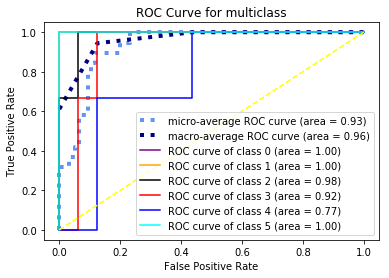

In [67]:
import matplotlib.pyplot as plt


y = label_binarize(l1_Y_test_nav_m, classes=[0,1,2,3,4,5])
n_classes = y.shape[1]

classifier = OneVsRestClassifier(l1_clf_nav_m)
y_score = classifier.fit(l1_X_train_nav_m_new,l1_Y_train_nav_m).predict_proba(l1_X_test_nav_m_new)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], p= roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='cornflowerblue', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['purple', 'orange', 'black','red','blue','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1],linestyle='--',color='yellow')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multiclass')
plt.legend(loc="lower right")
plt.show()

The accuracy for Gaussian Naive Bayes' is 0.5789473684210527 while it is 0.8947368421052632 for Multinomial Naive Bayes'.
Thus, Multinomial Naive Bayes' performs better for this problem.

Even if we compare across parameters such precision, recall and f1-score for the different classes, Multinomial Naive Bayes' classifier perfomrs better across the different classes.

### Solution to 1(f)(iii) as below:

The accuracy for the problem using Multi-class classification L1-penalized logistic regression came out to be 0.7368421052631579. This is lower than the accuracy we get for Multinomial Naive Bayes' classifier (0.8947368421052632). Hence, we can say Multinomial Naive Bayes' classifier suits this problems the most.

### Solution to 2. as below:

(a) We can expect the RSS for train data to be lower in case of cubic regression than in linear regression. This is because due to the nature of the curve, the cubic model will overfit to the training data and have a lower bias than the linear regression model.

(b) The true model is linear,the cubic model which overfitted to the train data won't be able to generalize to the new test points which have a linear relationship. Hence, We can expect the RSS for test data to be lower in case of linear regression than in cubic regression. The model we fit for linear regression on train data can generalize to newer points of test data better than the cubic point.

(c) Again, due to the nature of the coefficients and the curve of the cubic regression, it will have a lower RSS than the linear model. The linear model will again have a higher bias and lower variance in this case.

(d) This depends on the true relationship of the model. If the true relationship of the model is closer to the linear than the cubic model, than linear regression will have a lower RSS than the cubic model. It will be the opposite if the true model is closer to cubic expression.

### Solution to 3 and 4 are scanned and included in the zip file
